In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_10degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((37*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((37*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(155, 100, 100)


In [17]:
print(y_test.shape)

(67, 100, 100)


In [18]:
print(x_train.shape)

(155, 15, 1)


In [19]:
print(x_test.shape)

(67, 15, 1)


In [20]:
theta_train.shape

(155,)

In [21]:
tsr_train.shape

(155,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((155, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((67, 2, 1))

In [28]:
tsr_theta_train.shape

(155, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
4/4 [==============================] - 1s 7ms/step - loss: 0.0110 - rmse: 0.1042
Epoch 2/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1036
Epoch 3/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 4/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1024
Epoch 5/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.1015
Epoch 6/10000
4/4 [==============================] - 0s 7ms/step - loss: 0.0102 - rmse: 0.1001
Epoch 7/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0982
Epoch 8/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0956
Epoch 9/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0087 - rmse: 0.0924
Epoch 10/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0892
Epoch 11/10000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 87/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 88/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 89/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 90/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 91/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 92/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0822
Epoch 93/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0822
Epoch 94/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0822
Epoch 95/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0822
Epoch 96/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 171/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 172/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 173/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0794
Epoch 174/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 175/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 176/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 177/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 178/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 179/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 180/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0770
Epoch 255/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0769
Epoch 256/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 257/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 258/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 259/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 260/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0767
Epoch 261/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0767
Epoch 262/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0766
Epoch 263/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0765
Epoch 264/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 339/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 340/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 341/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 342/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 343/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 344/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 345/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 346/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 347/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0732
Epoch 348/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 423/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 424/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 425/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 426/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 427/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 428/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 429/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0705
Epoch 430/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 431/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 432/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0675
Epoch 507/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0673
Epoch 508/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 509/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 510/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 511/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 512/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 513/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 514/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 515/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 516/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 591/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 592/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 593/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 594/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 595/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 596/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 597/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 598/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 599/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 600/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0526
Epoch 675/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 676/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 677/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 678/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 679/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 680/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0525
Epoch 681/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 682/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 683/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0519
Epoch 684/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 759/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 760/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 761/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 762/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 763/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 764/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 765/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 766/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 767/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 768/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 843/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 844/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0407
Epoch 845/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 846/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 847/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 848/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 849/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 850/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 851/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 852/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0369
Epoch 927/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0368
Epoch 928/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0368
Epoch 929/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0367
Epoch 930/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 931/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 932/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 933/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 934/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 935/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 936/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 1011/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 1012/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 1013/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 1014/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 1015/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 1016/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 1017/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 1018/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 1019/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 1020/10000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0307
Epoch 1094/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0307
Epoch 1095/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 1096/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 1097/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 1098/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 1099/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 1100/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 1101/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 1102/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 1103/10000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 9.1803e-04 - rmse: 0.0286
Epoch 1175/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.1151e-04 - rmse: 0.0285
Epoch 1176/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0823e-04 - rmse: 0.0284
Epoch 1177/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.0803e-04 - rmse: 0.0284
Epoch 1178/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0878e-04 - rmse: 0.0284
Epoch 1179/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0328e-04 - rmse: 0.0283
Epoch 1180/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0286e-04 - rmse: 0.0283
Epoch 1181/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1150e-04 - rmse: 0.0285
Epoch 1182/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0615e-04 - rmse: 0.0284
Epoch 1183/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0103e-04 - rmse: 0.02

4/4 [==============================] - 0s 6ms/step - loss: 8.0929e-04 - rmse: 0.0266
Epoch 1255/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1745e-04 - rmse: 0.0268
Epoch 1256/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.2029e-04 - rmse: 0.0268
Epoch 1257/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0860e-04 - rmse: 0.0266
Epoch 1258/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0259e-04 - rmse: 0.0265
Epoch 1259/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.9730e-04 - rmse: 0.0264
Epoch 1260/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.9755e-04 - rmse: 0.0264
Epoch 1261/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9264e-04 - rmse: 0.0263
Epoch 1262/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.9306e-04 - rmse: 0.0263
Epoch 1263/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.9009e-04 - rmse: 0.02

4/4 [==============================] - 0s 6ms/step - loss: 7.0999e-04 - rmse: 0.0247
Epoch 1335/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0970e-04 - rmse: 0.0247
Epoch 1336/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.1217e-04 - rmse: 0.0248
Epoch 1337/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0991e-04 - rmse: 0.0247
Epoch 1338/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0948e-04 - rmse: 0.0247
Epoch 1339/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0897e-04 - rmse: 0.0247
Epoch 1340/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1011e-04 - rmse: 0.0247
Epoch 1341/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0297e-04 - rmse: 0.0246
Epoch 1342/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0328e-04 - rmse: 0.0246
Epoch 1343/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0032e-04 - rmse: 0.02

4/4 [==============================] - 0s 5ms/step - loss: 6.3875e-04 - rmse: 0.0232
Epoch 1415/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3404e-04 - rmse: 0.0231
Epoch 1416/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3225e-04 - rmse: 0.0231
Epoch 1417/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3320e-04 - rmse: 0.0231
Epoch 1418/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3566e-04 - rmse: 0.0232
Epoch 1419/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3714e-04 - rmse: 0.0232
Epoch 1420/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3631e-04 - rmse: 0.0232
Epoch 1421/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3898e-04 - rmse: 0.0232
Epoch 1422/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3251e-04 - rmse: 0.0231
Epoch 1423/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3289e-04 - rmse: 0.02

4/4 [==============================] - 0s 5ms/step - loss: 5.7675e-04 - rmse: 0.0219
Epoch 1495/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7275e-04 - rmse: 0.0218
Epoch 1496/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6966e-04 - rmse: 0.0217
Epoch 1497/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7487e-04 - rmse: 0.0218
Epoch 1498/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6931e-04 - rmse: 0.0217
Epoch 1499/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6852e-04 - rmse: 0.0217
Epoch 1500/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6773e-04 - rmse: 0.0217
Epoch 1501/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6633e-04 - rmse: 0.0217
Epoch 1502/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6820e-04 - rmse: 0.0217
Epoch 1503/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6661e-04 - rmse: 0.02

4/4 [==============================] - 0s 6ms/step - loss: 5.2187e-04 - rmse: 0.0206
Epoch 1575/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2465e-04 - rmse: 0.0207
Epoch 1576/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2710e-04 - rmse: 0.0207
Epoch 1577/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2861e-04 - rmse: 0.0208
Epoch 1578/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3129e-04 - rmse: 0.0208
Epoch 1579/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3318e-04 - rmse: 0.0209
Epoch 1580/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1958e-04 - rmse: 0.0206
Epoch 1581/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1772e-04 - rmse: 0.0205
Epoch 1582/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2026e-04 - rmse: 0.0206
Epoch 1583/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1607e-04 - rmse: 0.02

4/4 [==============================] - 0s 5ms/step - loss: 4.7294e-04 - rmse: 0.0194
Epoch 1655/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7602e-04 - rmse: 0.0195
Epoch 1656/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7470e-04 - rmse: 0.0195
Epoch 1657/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7389e-04 - rmse: 0.0194
Epoch 1658/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7221e-04 - rmse: 0.0194
Epoch 1659/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7664e-04 - rmse: 0.0195
Epoch 1660/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7391e-04 - rmse: 0.0194
Epoch 1661/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6929e-04 - rmse: 0.0193
Epoch 1662/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7229e-04 - rmse: 0.0194
Epoch 1663/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6885e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 4.3810e-04 - rmse: 0.0185
Epoch 1735/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3294e-04 - rmse: 0.0184
Epoch 1736/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3219e-04 - rmse: 0.0184
Epoch 1737/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2722e-04 - rmse: 0.0182
Epoch 1738/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2818e-04 - rmse: 0.0182
Epoch 1739/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3049e-04 - rmse: 0.0183
Epoch 1740/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3478e-04 - rmse: 0.0184
Epoch 1741/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2962e-04 - rmse: 0.0183
Epoch 1742/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2808e-04 - rmse: 0.0182
Epoch 1743/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2542e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 4.2347e-04 - rmse: 0.0181
Epoch 1815/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2018e-04 - rmse: 0.0180
Epoch 1816/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1229e-04 - rmse: 0.0178
Epoch 1817/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0744e-04 - rmse: 0.0177
Epoch 1818/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0586e-04 - rmse: 0.0176
Epoch 1819/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.9886e-04 - rmse: 0.0174
Epoch 1820/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9601e-04 - rmse: 0.0174
Epoch 1821/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9578e-04 - rmse: 0.0173
Epoch 1822/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9567e-04 - rmse: 0.0173
Epoch 1823/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9212e-04 - rmse: 0.0

4/4 [==============================] - 0s 6ms/step - loss: 3.6766e-04 - rmse: 0.0165
Epoch 1895/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7098e-04 - rmse: 0.0166
Epoch 1896/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6908e-04 - rmse: 0.0166
Epoch 1897/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6874e-04 - rmse: 0.0166
Epoch 1898/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6874e-04 - rmse: 0.0166
Epoch 1899/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6544e-04 - rmse: 0.0165
Epoch 1900/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6439e-04 - rmse: 0.0164
Epoch 1901/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6497e-04 - rmse: 0.0165
Epoch 1902/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6326e-04 - rmse: 0.0164
Epoch 1903/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6283e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 3.3741e-04 - rmse: 0.0156
Epoch 1975/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3476e-04 - rmse: 0.0155
Epoch 1976/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3390e-04 - rmse: 0.0155
Epoch 1977/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3649e-04 - rmse: 0.0156
Epoch 1978/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3875e-04 - rmse: 0.0156
Epoch 1979/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3770e-04 - rmse: 0.0156
Epoch 1980/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3700e-04 - rmse: 0.0156
Epoch 1981/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3852e-04 - rmse: 0.0156
Epoch 1982/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4072e-04 - rmse: 0.0157
Epoch 1983/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3518e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 3.3181e-04 - rmse: 0.0154
Epoch 2055/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3103e-04 - rmse: 0.0154
Epoch 2056/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3167e-04 - rmse: 0.0154
Epoch 2057/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3190e-04 - rmse: 0.0154
Epoch 2058/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2717e-04 - rmse: 0.0153
Epoch 2059/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2521e-04 - rmse: 0.0152
Epoch 2060/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2612e-04 - rmse: 0.0153
Epoch 2061/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.2525e-04 - rmse: 0.0152
Epoch 2062/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2431e-04 - rmse: 0.0152
Epoch 2063/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2498e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.9961e-04 - rmse: 0.0144
Epoch 2135/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9919e-04 - rmse: 0.0144
Epoch 2136/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9595e-04 - rmse: 0.0142
Epoch 2137/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9525e-04 - rmse: 0.0142
Epoch 2138/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9706e-04 - rmse: 0.0143
Epoch 2139/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.9774e-04 - rmse: 0.0143
Epoch 2140/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9424e-04 - rmse: 0.0142
Epoch 2141/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9535e-04 - rmse: 0.0142
Epoch 2142/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9218e-04 - rmse: 0.0141
Epoch 2143/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9452e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.8149e-04 - rmse: 0.0137
Epoch 2215/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8075e-04 - rmse: 0.0137
Epoch 2216/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8042e-04 - rmse: 0.0137
Epoch 2217/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7722e-04 - rmse: 0.0136
Epoch 2218/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8042e-04 - rmse: 0.0137
Epoch 2219/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7969e-04 - rmse: 0.0137
Epoch 2220/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7723e-04 - rmse: 0.0136
Epoch 2221/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7929e-04 - rmse: 0.0137
Epoch 2222/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8237e-04 - rmse: 0.0138
Epoch 2223/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7928e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.6766e-04 - rmse: 0.0132
Epoch 2295/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6411e-04 - rmse: 0.0131
Epoch 2296/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6077e-04 - rmse: 0.0130
Epoch 2297/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5821e-04 - rmse: 0.0129
Epoch 2298/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5890e-04 - rmse: 0.0129
Epoch 2299/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5957e-04 - rmse: 0.0129
Epoch 2300/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5774e-04 - rmse: 0.0129
Epoch 2301/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5958e-04 - rmse: 0.0129
Epoch 2302/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5826e-04 - rmse: 0.0129
Epoch 2303/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6275e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.6610e-04 - rmse: 0.0132
Epoch 2375/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6416e-04 - rmse: 0.0131
Epoch 2376/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5492e-04 - rmse: 0.0128
Epoch 2377/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5384e-04 - rmse: 0.0127
Epoch 2378/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5242e-04 - rmse: 0.0127
Epoch 2379/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4837e-04 - rmse: 0.0125
Epoch 2380/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4846e-04 - rmse: 0.0125
Epoch 2381/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4961e-04 - rmse: 0.0126
Epoch 2382/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5277e-04 - rmse: 0.0127
Epoch 2383/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5182e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.5212e-04 - rmse: 0.0127
Epoch 2455/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5018e-04 - rmse: 0.0126
Epoch 2456/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4668e-04 - rmse: 0.0124
Epoch 2457/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4388e-04 - rmse: 0.0123
Epoch 2458/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3999e-04 - rmse: 0.0122
Epoch 2459/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3836e-04 - rmse: 0.0121
Epoch 2460/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3848e-04 - rmse: 0.0121
Epoch 2461/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3850e-04 - rmse: 0.0121
Epoch 2462/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3672e-04 - rmse: 0.0120
Epoch 2463/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3546e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.3277e-04 - rmse: 0.0119
Epoch 2535/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3105e-04 - rmse: 0.0118
Epoch 2536/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3592e-04 - rmse: 0.0120
Epoch 2537/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3803e-04 - rmse: 0.0121
Epoch 2538/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3613e-04 - rmse: 0.0120
Epoch 2539/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3211e-04 - rmse: 0.0119
Epoch 2540/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3284e-04 - rmse: 0.0119
Epoch 2541/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3111e-04 - rmse: 0.0118
Epoch 2542/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3148e-04 - rmse: 0.0118
Epoch 2543/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3030e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.2125e-04 - rmse: 0.0114
Epoch 2615/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1727e-04 - rmse: 0.0112
Epoch 2616/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1772e-04 - rmse: 0.0112
Epoch 2617/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2162e-04 - rmse: 0.0114
Epoch 2618/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3018e-04 - rmse: 0.0118
Epoch 2619/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2150e-04 - rmse: 0.0114
Epoch 2620/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2553e-04 - rmse: 0.0116
Epoch 2621/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3014e-04 - rmse: 0.0118
Epoch 2622/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2384e-04 - rmse: 0.0115
Epoch 2623/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2520e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.1184e-04 - rmse: 0.0110
Epoch 2695/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0991e-04 - rmse: 0.0109
Epoch 2696/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0846e-04 - rmse: 0.0108
Epoch 2697/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1308e-04 - rmse: 0.0111
Epoch 2698/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1453e-04 - rmse: 0.0111
Epoch 2699/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1048e-04 - rmse: 0.0109
Epoch 2700/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0902e-04 - rmse: 0.0109
Epoch 2701/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1057e-04 - rmse: 0.0109
Epoch 2702/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1194e-04 - rmse: 0.0110
Epoch 2703/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0996e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 1.9802e-04 - rmse: 0.0104
Epoch 2775/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9915e-04 - rmse: 0.0104
Epoch 2776/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9827e-04 - rmse: 0.0104
Epoch 2777/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9744e-04 - rmse: 0.0103
Epoch 2778/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9889e-04 - rmse: 0.0104
Epoch 2779/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0147e-04 - rmse: 0.0105
Epoch 2780/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0489e-04 - rmse: 0.0107
Epoch 2781/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0692e-04 - rmse: 0.0108
Epoch 2782/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0606e-04 - rmse: 0.0107
Epoch 2783/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0796e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 1.9591e-04 - rmse: 0.0103
Epoch 2855/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9807e-04 - rmse: 0.0104
Epoch 2856/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9640e-04 - rmse: 0.0103
Epoch 2857/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9922e-04 - rmse: 0.0104
Epoch 2858/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9883e-04 - rmse: 0.0104
Epoch 2859/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9516e-04 - rmse: 0.0102
Epoch 2860/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9406e-04 - rmse: 0.0102
Epoch 2861/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9245e-04 - rmse: 0.0101
Epoch 2862/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9196e-04 - rmse: 0.0101
Epoch 2863/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9254e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 1.9153e-04 - rmse: 0.0101
Epoch 2935/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9475e-04 - rmse: 0.0102
Epoch 2936/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9464e-04 - rmse: 0.0102
Epoch 2937/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9235e-04 - rmse: 0.0101
Epoch 2938/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8934e-04 - rmse: 0.0100
Epoch 2939/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8739e-04 - rmse: 0.0099
Epoch 2940/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8554e-04 - rmse: 0.0098
Epoch 2941/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8636e-04 - rmse: 0.0098
Epoch 2942/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8480e-04 - rmse: 0.0097
Epoch 2943/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8404e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.8054e-04 - rmse: 0.0095
Epoch 3015/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8214e-04 - rmse: 0.0096
Epoch 3016/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7937e-04 - rmse: 0.0095
Epoch 3017/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8129e-04 - rmse: 0.0096
Epoch 3018/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8943e-04 - rmse: 0.0100
Epoch 3019/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9012e-04 - rmse: 0.0100
Epoch 3020/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8919e-04 - rmse: 0.0100
Epoch 3021/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9466e-04 - rmse: 0.0102
Epoch 3022/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9650e-04 - rmse: 0.0103
Epoch 3023/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9457e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 1.7823e-04 - rmse: 0.0094
Epoch 3095/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7668e-04 - rmse: 0.0093
Epoch 3096/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7629e-04 - rmse: 0.0093
Epoch 3097/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7504e-04 - rmse: 0.0092
Epoch 3098/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7608e-04 - rmse: 0.0093
Epoch 3099/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7675e-04 - rmse: 0.0093
Epoch 3100/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7649e-04 - rmse: 0.0093
Epoch 3101/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7585e-04 - rmse: 0.0093
Epoch 3102/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7507e-04 - rmse: 0.0092
Epoch 3103/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7452e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.7600e-04 - rmse: 0.0093
Epoch 3175/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7484e-04 - rmse: 0.0092
Epoch 3176/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7375e-04 - rmse: 0.0092
Epoch 3177/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7206e-04 - rmse: 0.0091
Epoch 3178/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7376e-04 - rmse: 0.0092
Epoch 3179/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7472e-04 - rmse: 0.0092
Epoch 3180/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7573e-04 - rmse: 0.0093
Epoch 3181/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7206e-04 - rmse: 0.0091
Epoch 3182/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7279e-04 - rmse: 0.0091
Epoch 3183/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7164e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6566e-04 - rmse: 0.0088
Epoch 3255/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6606e-04 - rmse: 0.0088
Epoch 3256/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6433e-04 - rmse: 0.0087
Epoch 3257/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6387e-04 - rmse: 0.0086
Epoch 3258/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6506e-04 - rmse: 0.0087
Epoch 3259/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6708e-04 - rmse: 0.0088
Epoch 3260/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6747e-04 - rmse: 0.0089
Epoch 3261/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6738e-04 - rmse: 0.0089
Epoch 3262/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6843e-04 - rmse: 0.0089
Epoch 3263/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6843e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6304e-04 - rmse: 0.0086
Epoch 3335/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6279e-04 - rmse: 0.0086
Epoch 3336/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6674e-04 - rmse: 0.0088
Epoch 3337/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6954e-04 - rmse: 0.0090
Epoch 3338/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6546e-04 - rmse: 0.0088
Epoch 3339/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6537e-04 - rmse: 0.0088
Epoch 3340/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6517e-04 - rmse: 0.0087
Epoch 3341/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7225e-04 - rmse: 0.0091
Epoch 3342/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7572e-04 - rmse: 0.0093
Epoch 3343/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7352e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.5832e-04 - rmse: 0.0084
Epoch 3415/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5758e-04 - rmse: 0.0083
Epoch 3416/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5661e-04 - rmse: 0.0083
Epoch 3417/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5727e-04 - rmse: 0.0083
Epoch 3418/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5738e-04 - rmse: 0.0083
Epoch 3419/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5973e-04 - rmse: 0.0084
Epoch 3420/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6129e-04 - rmse: 0.0085
Epoch 3421/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6026e-04 - rmse: 0.0085
Epoch 3422/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6315e-04 - rmse: 0.0086
Epoch 3423/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6186e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.5567e-04 - rmse: 0.0082
Epoch 3495/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5440e-04 - rmse: 0.0081
Epoch 3496/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5496e-04 - rmse: 0.0082
Epoch 3497/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5601e-04 - rmse: 0.0082
Epoch 3498/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5456e-04 - rmse: 0.0081
Epoch 3499/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5481e-04 - rmse: 0.0082
Epoch 3500/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5690e-04 - rmse: 0.0083
Epoch 3501/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5609e-04 - rmse: 0.0082
Epoch 3502/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5590e-04 - rmse: 0.0082
Epoch 3503/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5585e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6391e-04 - rmse: 0.0087
Epoch 3575/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6638e-04 - rmse: 0.0089
Epoch 3576/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6248e-04 - rmse: 0.0086
Epoch 3577/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5949e-04 - rmse: 0.0085
Epoch 3578/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5884e-04 - rmse: 0.0084
Epoch 3579/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5749e-04 - rmse: 0.0083
Epoch 3580/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5880e-04 - rmse: 0.0084
Epoch 3581/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5527e-04 - rmse: 0.0082
Epoch 3582/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5434e-04 - rmse: 0.0081
Epoch 3583/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5418e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.4900e-04 - rmse: 0.0078
Epoch 3655/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4795e-04 - rmse: 0.0078
Epoch 3656/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4961e-04 - rmse: 0.0079
Epoch 3657/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4896e-04 - rmse: 0.0078
Epoch 3658/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4816e-04 - rmse: 0.0078
Epoch 3659/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4726e-04 - rmse: 0.0077
Epoch 3660/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4776e-04 - rmse: 0.0078
Epoch 3661/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4926e-04 - rmse: 0.0078
Epoch 3662/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4884e-04 - rmse: 0.0078
Epoch 3663/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5037e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.4610e-04 - rmse: 0.0077
Epoch 3735/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4634e-04 - rmse: 0.0077
Epoch 3736/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4568e-04 - rmse: 0.0076
Epoch 3737/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4696e-04 - rmse: 0.0077
Epoch 3738/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4716e-04 - rmse: 0.0077
Epoch 3739/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4579e-04 - rmse: 0.0076
Epoch 3740/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4679e-04 - rmse: 0.0077
Epoch 3741/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4558e-04 - rmse: 0.0076
Epoch 3742/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4475e-04 - rmse: 0.0076
Epoch 3743/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4496e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.4379e-04 - rmse: 0.0075
Epoch 3815/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4431e-04 - rmse: 0.0076
Epoch 3816/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4607e-04 - rmse: 0.0077
Epoch 3817/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4662e-04 - rmse: 0.0077
Epoch 3818/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4739e-04 - rmse: 0.0078
Epoch 3819/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4921e-04 - rmse: 0.0079
Epoch 3820/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4462e-04 - rmse: 0.0076
Epoch 3821/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4624e-04 - rmse: 0.0077
Epoch 3822/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4479e-04 - rmse: 0.0076
Epoch 3823/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4623e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.4423e-04 - rmse: 0.0076
Epoch 3895/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4370e-04 - rmse: 0.0075
Epoch 3896/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4221e-04 - rmse: 0.0074
Epoch 3897/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4060e-04 - rmse: 0.0073
Epoch 3898/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4229e-04 - rmse: 0.0074
Epoch 3899/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4258e-04 - rmse: 0.0075
Epoch 3900/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4155e-04 - rmse: 0.0074
Epoch 3901/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4211e-04 - rmse: 0.0074
Epoch 3902/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4026e-04 - rmse: 0.0073
Epoch 3903/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4353e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.4367e-04 - rmse: 0.0076
Epoch 3975/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4386e-04 - rmse: 0.0076
Epoch 3976/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4587e-04 - rmse: 0.0077
Epoch 3977/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4201e-04 - rmse: 0.0074
Epoch 3978/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4180e-04 - rmse: 0.0074
Epoch 3979/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4131e-04 - rmse: 0.0074
Epoch 3980/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4259e-04 - rmse: 0.0075
Epoch 3981/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4338e-04 - rmse: 0.0075
Epoch 3982/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4474e-04 - rmse: 0.0076
Epoch 3983/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4216e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3975e-04 - rmse: 0.0073
Epoch 4055/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4016e-04 - rmse: 0.0073
Epoch 4056/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3757e-04 - rmse: 0.0072
Epoch 4057/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3519e-04 - rmse: 0.0070
Epoch 4058/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3674e-04 - rmse: 0.0071
Epoch 4059/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3559e-04 - rmse: 0.0070
Epoch 4060/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3828e-04 - rmse: 0.0072
Epoch 4061/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3852e-04 - rmse: 0.0072
Epoch 4062/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3826e-04 - rmse: 0.0072
Epoch 4063/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4003e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3586e-04 - rmse: 0.0071
Epoch 4135/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3454e-04 - rmse: 0.0070
Epoch 4136/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3553e-04 - rmse: 0.0070
Epoch 4137/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3383e-04 - rmse: 0.0069
Epoch 4138/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3572e-04 - rmse: 0.0071
Epoch 4139/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3648e-04 - rmse: 0.0071
Epoch 4140/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3452e-04 - rmse: 0.0070
Epoch 4141/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3431e-04 - rmse: 0.0070
Epoch 4142/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3434e-04 - rmse: 0.0070
Epoch 4143/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3541e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3368e-04 - rmse: 0.0069
Epoch 4215/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3493e-04 - rmse: 0.0070
Epoch 4216/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3998e-04 - rmse: 0.0074
Epoch 4217/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3847e-04 - rmse: 0.0073
Epoch 4218/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4757e-04 - rmse: 0.0079
Epoch 4219/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4469e-04 - rmse: 0.0077
Epoch 4220/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5153e-04 - rmse: 0.0081
Epoch 4221/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5274e-04 - rmse: 0.0082
Epoch 4222/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4144e-04 - rmse: 0.0075
Epoch 4223/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4135e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3372e-04 - rmse: 0.0069
Epoch 4295/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3380e-04 - rmse: 0.0070
Epoch 4296/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3818e-04 - rmse: 0.0073
Epoch 4297/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3271e-04 - rmse: 0.0069
Epoch 4298/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3314e-04 - rmse: 0.0069
Epoch 4299/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3459e-04 - rmse: 0.0070
Epoch 4300/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3380e-04 - rmse: 0.0070
Epoch 4301/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3502e-04 - rmse: 0.0070
Epoch 4302/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3283e-04 - rmse: 0.0069
Epoch 4303/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3451e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2823e-04 - rmse: 0.0066
Epoch 4375/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2826e-04 - rmse: 0.0066
Epoch 4376/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2671e-04 - rmse: 0.0064
Epoch 4377/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2802e-04 - rmse: 0.0065
Epoch 4378/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2959e-04 - rmse: 0.0067
Epoch 4379/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3016e-04 - rmse: 0.0067
Epoch 4380/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2894e-04 - rmse: 0.0066
Epoch 4381/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2966e-04 - rmse: 0.0067
Epoch 4382/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2906e-04 - rmse: 0.0066
Epoch 4383/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2953e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2544e-04 - rmse: 0.0064
Epoch 4455/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2554e-04 - rmse: 0.0064
Epoch 4456/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2729e-04 - rmse: 0.0065
Epoch 4457/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2632e-04 - rmse: 0.0064
Epoch 4458/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2754e-04 - rmse: 0.0065
Epoch 4459/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2627e-04 - rmse: 0.0064
Epoch 4460/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2647e-04 - rmse: 0.0064
Epoch 4461/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2738e-04 - rmse: 0.0065
Epoch 4462/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2940e-04 - rmse: 0.0067
Epoch 4463/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2947e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3620e-04 - rmse: 0.0072
Epoch 4535/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4067e-04 - rmse: 0.0075
Epoch 4536/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3865e-04 - rmse: 0.0074
Epoch 4537/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4616e-04 - rmse: 0.0078
Epoch 4538/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3981e-04 - rmse: 0.0074
Epoch 4539/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4135e-04 - rmse: 0.0075
Epoch 4540/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4105e-04 - rmse: 0.0075
Epoch 4541/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4299e-04 - rmse: 0.0076
Epoch 4542/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4386e-04 - rmse: 0.0077
Epoch 4543/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4770e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2816e-04 - rmse: 0.0066
Epoch 4615/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2621e-04 - rmse: 0.0065
Epoch 4616/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2477e-04 - rmse: 0.0064
Epoch 4617/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2451e-04 - rmse: 0.0063
Epoch 4618/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2435e-04 - rmse: 0.0063
Epoch 4619/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2474e-04 - rmse: 0.0064
Epoch 4620/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2612e-04 - rmse: 0.0065
Epoch 4621/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2651e-04 - rmse: 0.0065
Epoch 4622/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2772e-04 - rmse: 0.0066
Epoch 4623/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2537e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2935e-04 - rmse: 0.0067
Epoch 4695/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2797e-04 - rmse: 0.0066
Epoch 4696/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2642e-04 - rmse: 0.0065
Epoch 4697/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2601e-04 - rmse: 0.0065
Epoch 4698/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2380e-04 - rmse: 0.0063
Epoch 4699/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2479e-04 - rmse: 0.0064
Epoch 4700/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2324e-04 - rmse: 0.0063
Epoch 4701/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2326e-04 - rmse: 0.0063
Epoch 4702/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2420e-04 - rmse: 0.0063
Epoch 4703/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2397e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2251e-04 - rmse: 0.0062
Epoch 4775/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2208e-04 - rmse: 0.0062
Epoch 4776/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2266e-04 - rmse: 0.0062
Epoch 4777/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2293e-04 - rmse: 0.0063
Epoch 4778/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2239e-04 - rmse: 0.0062
Epoch 4779/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2215e-04 - rmse: 0.0062
Epoch 4780/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2696e-04 - rmse: 0.0066
Epoch 4781/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2819e-04 - rmse: 0.0067
Epoch 4782/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2718e-04 - rmse: 0.0066
Epoch 4783/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2845e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.2139e-04 - rmse: 0.0062
Epoch 4855/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2138e-04 - rmse: 0.0062
Epoch 4856/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2073e-04 - rmse: 0.0061
Epoch 4857/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2362e-04 - rmse: 0.0063
Epoch 4858/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2340e-04 - rmse: 0.0063
Epoch 4859/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2483e-04 - rmse: 0.0064
Epoch 4860/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2443e-04 - rmse: 0.0064
Epoch 4861/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2580e-04 - rmse: 0.0065
Epoch 4862/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2559e-04 - rmse: 0.0065
Epoch 4863/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2381e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.1944e-04 - rmse: 0.0060
Epoch 4935/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1962e-04 - rmse: 0.0060
Epoch 4936/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1979e-04 - rmse: 0.0061
Epoch 4937/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2361e-04 - rmse: 0.0064
Epoch 4938/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2559e-04 - rmse: 0.0065
Epoch 4939/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2485e-04 - rmse: 0.0065
Epoch 4940/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2218e-04 - rmse: 0.0062
Epoch 4941/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2340e-04 - rmse: 0.0063
Epoch 4942/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2274e-04 - rmse: 0.0063
Epoch 4943/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2193e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2025e-04 - rmse: 0.0061
Epoch 5015/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1971e-04 - rmse: 0.0061
Epoch 5016/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1975e-04 - rmse: 0.0061
Epoch 5017/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1940e-04 - rmse: 0.0060
Epoch 5018/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1826e-04 - rmse: 0.0060
Epoch 5019/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1847e-04 - rmse: 0.0060
Epoch 5020/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1930e-04 - rmse: 0.0060
Epoch 5021/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1892e-04 - rmse: 0.0060
Epoch 5022/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1718e-04 - rmse: 0.0059
Epoch 5023/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1735e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2796e-04 - rmse: 0.0067
Epoch 5095/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2790e-04 - rmse: 0.0067
Epoch 5096/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2556e-04 - rmse: 0.0066
Epoch 5097/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2076e-04 - rmse: 0.0062
Epoch 5098/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2184e-04 - rmse: 0.0063
Epoch 5099/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2174e-04 - rmse: 0.0063
Epoch 5100/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2014e-04 - rmse: 0.0061
Epoch 5101/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1901e-04 - rmse: 0.0060
Epoch 5102/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1995e-04 - rmse: 0.0061
Epoch 5103/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1868e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2062e-04 - rmse: 0.0062
Epoch 5175/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1865e-04 - rmse: 0.0060
Epoch 5176/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1852e-04 - rmse: 0.0060
Epoch 5177/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2081e-04 - rmse: 0.0062
Epoch 5178/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2099e-04 - rmse: 0.0062
Epoch 5179/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2394e-04 - rmse: 0.0065
Epoch 5180/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2637e-04 - rmse: 0.0066
Epoch 5181/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2466e-04 - rmse: 0.0065
Epoch 5182/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2620e-04 - rmse: 0.0066
Epoch 5183/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2127e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1451e-04 - rmse: 0.0057
Epoch 5255/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1391e-04 - rmse: 0.0057
Epoch 5256/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1643e-04 - rmse: 0.0059
Epoch 5257/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1980e-04 - rmse: 0.0062
Epoch 5258/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1712e-04 - rmse: 0.0059
Epoch 5259/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1899e-04 - rmse: 0.0061
Epoch 5260/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1649e-04 - rmse: 0.0059
Epoch 5261/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1536e-04 - rmse: 0.0058
Epoch 5262/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1441e-04 - rmse: 0.0057
Epoch 5263/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1418e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1480e-04 - rmse: 0.0058
Epoch 5335/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1500e-04 - rmse: 0.0058
Epoch 5336/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1583e-04 - rmse: 0.0058
Epoch 5337/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1572e-04 - rmse: 0.0058
Epoch 5338/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1622e-04 - rmse: 0.0059
Epoch 5339/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1410e-04 - rmse: 0.0057
Epoch 5340/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1370e-04 - rmse: 0.0057
Epoch 5341/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1411e-04 - rmse: 0.0057
Epoch 5342/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1439e-04 - rmse: 0.0057
Epoch 5343/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1660e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1669e-04 - rmse: 0.0059
Epoch 5415/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1690e-04 - rmse: 0.0060
Epoch 5416/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1821e-04 - rmse: 0.0061
Epoch 5417/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1709e-04 - rmse: 0.0060
Epoch 5418/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1524e-04 - rmse: 0.0058
Epoch 5419/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1357e-04 - rmse: 0.0057
Epoch 5420/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1391e-04 - rmse: 0.0057
Epoch 5421/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1477e-04 - rmse: 0.0058
Epoch 5422/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1505e-04 - rmse: 0.0058
Epoch 5423/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1337e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2355e-04 - rmse: 0.0065
Epoch 5495/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2019e-04 - rmse: 0.0063
Epoch 5496/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1837e-04 - rmse: 0.0061
Epoch 5497/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1808e-04 - rmse: 0.0061
Epoch 5498/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1752e-04 - rmse: 0.0060
Epoch 5499/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1862e-04 - rmse: 0.0061
Epoch 5500/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1523e-04 - rmse: 0.0058
Epoch 5501/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1527e-04 - rmse: 0.0058
Epoch 5502/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1398e-04 - rmse: 0.0057
Epoch 5503/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1237e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1459e-04 - rmse: 0.0058
Epoch 5575/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1634e-04 - rmse: 0.0060
Epoch 5576/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1699e-04 - rmse: 0.0060
Epoch 5577/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1647e-04 - rmse: 0.0060
Epoch 5578/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1282e-04 - rmse: 0.0057
Epoch 5579/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1167e-04 - rmse: 0.0056
Epoch 5580/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1351e-04 - rmse: 0.0057
Epoch 5581/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1261e-04 - rmse: 0.0056
Epoch 5582/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1297e-04 - rmse: 0.0057
Epoch 5583/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1163e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0998e-04 - rmse: 0.0054
Epoch 5655/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0845e-04 - rmse: 0.0053
Epoch 5656/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0921e-04 - rmse: 0.0054
Epoch 5657/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0819e-04 - rmse: 0.0053
Epoch 5658/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0829e-04 - rmse: 0.0053
Epoch 5659/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0905e-04 - rmse: 0.0053
Epoch 5660/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0782e-04 - rmse: 0.0052
Epoch 5661/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0893e-04 - rmse: 0.0053
Epoch 5662/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0880e-04 - rmse: 0.0053
Epoch 5663/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0969e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1161e-04 - rmse: 0.0056
Epoch 5735/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1263e-04 - rmse: 0.0057
Epoch 5736/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1171e-04 - rmse: 0.0056
Epoch 5737/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1015e-04 - rmse: 0.0055
Epoch 5738/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1248e-04 - rmse: 0.0057
Epoch 5739/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1262e-04 - rmse: 0.0057
Epoch 5740/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1154e-04 - rmse: 0.0056
Epoch 5741/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1104e-04 - rmse: 0.0055
Epoch 5742/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1024e-04 - rmse: 0.0055
Epoch 5743/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0920e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1329e-04 - rmse: 0.0058
Epoch 5815/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1136e-04 - rmse: 0.0056
Epoch 5816/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0907e-04 - rmse: 0.0054
Epoch 5817/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0754e-04 - rmse: 0.0053
Epoch 5818/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0819e-04 - rmse: 0.0053
Epoch 5819/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0897e-04 - rmse: 0.0054
Epoch 5820/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0831e-04 - rmse: 0.0053
Epoch 5821/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0730e-04 - rmse: 0.0052
Epoch 5822/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0782e-04 - rmse: 0.0053
Epoch 5823/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0747e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1199e-04 - rmse: 0.0057
Epoch 5895/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1410e-04 - rmse: 0.0059
Epoch 5896/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1250e-04 - rmse: 0.0057
Epoch 5897/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1273e-04 - rmse: 0.0057
Epoch 5898/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1044e-04 - rmse: 0.0055
Epoch 5899/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1067e-04 - rmse: 0.0056
Epoch 5900/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1126e-04 - rmse: 0.0056
Epoch 5901/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1823e-04 - rmse: 0.0062
Epoch 5902/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1852e-04 - rmse: 0.0062
Epoch 5903/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1607e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0627e-04 - rmse: 0.0052
Epoch 5975/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0837e-04 - rmse: 0.0054
Epoch 5976/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0740e-04 - rmse: 0.0053
Epoch 5977/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0670e-04 - rmse: 0.0052
Epoch 5978/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0523e-04 - rmse: 0.0051
Epoch 5979/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0499e-04 - rmse: 0.0051
Epoch 5980/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0532e-04 - rmse: 0.0051
Epoch 5981/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0600e-04 - rmse: 0.0052
Epoch 5982/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0623e-04 - rmse: 0.0052
Epoch 5983/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0736e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1025e-04 - rmse: 0.0056
Epoch 6055/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0804e-04 - rmse: 0.0054
Epoch 6056/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0692e-04 - rmse: 0.0053
Epoch 6057/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0626e-04 - rmse: 0.0052
Epoch 6058/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0545e-04 - rmse: 0.0051
Epoch 6059/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0463e-04 - rmse: 0.0051
Epoch 6060/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0635e-04 - rmse: 0.0052
Epoch 6061/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0529e-04 - rmse: 0.0051
Epoch 6062/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0564e-04 - rmse: 0.0052
Epoch 6063/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0559e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0572e-04 - rmse: 0.0052
Epoch 6135/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1178e-04 - rmse: 0.0057
Epoch 6136/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1839e-04 - rmse: 0.0063
Epoch 6137/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1944e-04 - rmse: 0.0064
Epoch 6138/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1419e-04 - rmse: 0.0059
Epoch 6139/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1611e-04 - rmse: 0.0061
Epoch 6140/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1338e-04 - rmse: 0.0059
Epoch 6141/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2230e-04 - rmse: 0.0066
Epoch 6142/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1571e-04 - rmse: 0.0061
Epoch 6143/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1351e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0545e-04 - rmse: 0.0052
Epoch 6215/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0523e-04 - rmse: 0.0052
Epoch 6216/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0459e-04 - rmse: 0.0051
Epoch 6217/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0379e-04 - rmse: 0.0050
Epoch 6218/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0458e-04 - rmse: 0.0051
Epoch 6219/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0363e-04 - rmse: 0.0050
Epoch 6220/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0320e-04 - rmse: 0.0050
Epoch 6221/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0239e-04 - rmse: 0.0049
Epoch 6222/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0180e-04 - rmse: 0.0048
Epoch 6223/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0217e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0212e-04 - rmse: 0.0049
Epoch 6295/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0322e-04 - rmse: 0.0050
Epoch 6296/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0442e-04 - rmse: 0.0051
Epoch 6297/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0331e-04 - rmse: 0.0050
Epoch 6298/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0360e-04 - rmse: 0.0050
Epoch 6299/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0450e-04 - rmse: 0.0051
Epoch 6300/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0350e-04 - rmse: 0.0050
Epoch 6301/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0418e-04 - rmse: 0.0051
Epoch 6302/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0315e-04 - rmse: 0.0050
Epoch 6303/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0352e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0297e-04 - rmse: 0.0050
Epoch 6375/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0320e-04 - rmse: 0.0050
Epoch 6376/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0316e-04 - rmse: 0.0050
Epoch 6377/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0196e-04 - rmse: 0.0049
Epoch 6378/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0121e-04 - rmse: 0.0048
Epoch 6379/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0165e-04 - rmse: 0.0049
Epoch 6380/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0038e-04 - rmse: 0.0047
Epoch 6381/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0041e-04 - rmse: 0.0047
Epoch 6382/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0109e-04 - rmse: 0.0048
Epoch 6383/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0139e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0222e-04 - rmse: 0.0049
Epoch 6455/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0180e-04 - rmse: 0.0049
Epoch 6456/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0193e-04 - rmse: 0.0049
Epoch 6457/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0099e-04 - rmse: 0.0048
Epoch 6458/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0039e-04 - rmse: 0.0048
Epoch 6459/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0019e-04 - rmse: 0.0047
Epoch 6460/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0060e-04 - rmse: 0.0048
Epoch 6461/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0115e-04 - rmse: 0.0048
Epoch 6462/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9929e-05 - rmse: 0.0047
Epoch 6463/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9691e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0212e-04 - rmse: 0.0050
Epoch 6535/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0449e-04 - rmse: 0.0052
Epoch 6536/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0250e-04 - rmse: 0.0050
Epoch 6537/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0235e-04 - rmse: 0.0050
Epoch 6538/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0360e-04 - rmse: 0.0051
Epoch 6539/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0367e-04 - rmse: 0.0051
Epoch 6540/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0274e-04 - rmse: 0.0050
Epoch 6541/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0362e-04 - rmse: 0.0051
Epoch 6542/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0495e-04 - rmse: 0.0052
Epoch 6543/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0523e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0140e-04 - rmse: 0.0049
Epoch 6615/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0172e-04 - rmse: 0.0050
Epoch 6616/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0323e-04 - rmse: 0.0051
Epoch 6617/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0352e-04 - rmse: 0.0051
Epoch 6618/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0230e-04 - rmse: 0.0050
Epoch 6619/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0169e-04 - rmse: 0.0050
Epoch 6620/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9961e-05 - rmse: 0.0048
Epoch 6621/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0065e-04 - rmse: 0.0048
Epoch 6622/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0130e-04 - rmse: 0.0049
Epoch 6623/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9984e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0840e-04 - rmse: 0.0056
Epoch 6695/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0923e-04 - rmse: 0.0057
Epoch 6696/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0640e-04 - rmse: 0.0054
Epoch 6697/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0608e-04 - rmse: 0.0054
Epoch 6698/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0583e-04 - rmse: 0.0054
Epoch 6699/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0596e-04 - rmse: 0.0054
Epoch 6700/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0529e-04 - rmse: 0.0053
Epoch 6701/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0414e-04 - rmse: 0.0052
Epoch 6702/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0453e-04 - rmse: 0.0053
Epoch 6703/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0298e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.9084e-05 - rmse: 0.0047
Epoch 6775/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9192e-05 - rmse: 0.0048
Epoch 6776/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8308e-05 - rmse: 0.0047
Epoch 6777/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8978e-05 - rmse: 0.0047
Epoch 6778/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0071e-04 - rmse: 0.0049
Epoch 6779/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.8924e-05 - rmse: 0.0047
Epoch 6780/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9336e-05 - rmse: 0.0048
Epoch 6781/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9421e-05 - rmse: 0.0048
Epoch 6782/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9138e-05 - rmse: 0.0047
Epoch 6783/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.8737e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.9649e-05 - rmse: 0.0048
Epoch 6855/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0196e-04 - rmse: 0.0051
Epoch 6856/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0053e-04 - rmse: 0.0049
Epoch 6857/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0142e-04 - rmse: 0.0050
Epoch 6858/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0180e-04 - rmse: 0.0050
Epoch 6859/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0382e-04 - rmse: 0.0052
Epoch 6860/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0268e-04 - rmse: 0.0051
Epoch 6861/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0250e-04 - rmse: 0.0051
Epoch 6862/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0206e-04 - rmse: 0.0051
Epoch 6863/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0670e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.7495e-05 - rmse: 0.0046
Epoch 6935/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7526e-05 - rmse: 0.0046
Epoch 6936/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6688e-05 - rmse: 0.0045
Epoch 6937/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6654e-05 - rmse: 0.0045
Epoch 6938/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5305e-05 - rmse: 0.0044
Epoch 6939/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5580e-05 - rmse: 0.0044
Epoch 6940/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6505e-05 - rmse: 0.0045
Epoch 6941/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7742e-05 - rmse: 0.0047
Epoch 6942/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8078e-05 - rmse: 0.0047
Epoch 6943/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7311e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.8505e-05 - rmse: 0.0048
Epoch 7015/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8243e-05 - rmse: 0.0047
Epoch 7016/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7945e-05 - rmse: 0.0047
Epoch 7017/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7970e-05 - rmse: 0.0047
Epoch 7018/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6760e-05 - rmse: 0.0046
Epoch 7019/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6100e-05 - rmse: 0.0045
Epoch 7020/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5833e-05 - rmse: 0.0045
Epoch 7021/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6120e-05 - rmse: 0.0045
Epoch 7022/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6560e-05 - rmse: 0.0046
Epoch 7023/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7570e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0021e-04 - rmse: 0.0050
Epoch 7095/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9894e-05 - rmse: 0.0049
Epoch 7096/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0140e-04 - rmse: 0.0051
Epoch 7097/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0163e-04 - rmse: 0.0051
Epoch 7098/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0183e-04 - rmse: 0.0051
Epoch 7099/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0423e-04 - rmse: 0.0054
Epoch 7100/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0871e-04 - rmse: 0.0058
Epoch 7101/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0800e-04 - rmse: 0.0057
Epoch 7102/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0559e-04 - rmse: 0.0055
Epoch 7103/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1177e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0673e-04 - rmse: 0.0056
Epoch 7175/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0517e-04 - rmse: 0.0055
Epoch 7176/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0563e-04 - rmse: 0.0055
Epoch 7177/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0294e-04 - rmse: 0.0053
Epoch 7178/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0595e-04 - rmse: 0.0055
Epoch 7179/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0833e-04 - rmse: 0.0058
Epoch 7180/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0353e-04 - rmse: 0.0053
Epoch 7181/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0441e-04 - rmse: 0.0054
Epoch 7182/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0335e-04 - rmse: 0.0053
Epoch 7183/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9114e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.5223e-05 - rmse: 0.0045
Epoch 7255/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4575e-05 - rmse: 0.0044
Epoch 7256/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4451e-05 - rmse: 0.0044
Epoch 7257/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4307e-05 - rmse: 0.0044
Epoch 7258/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5516e-05 - rmse: 0.0045
Epoch 7259/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7248e-05 - rmse: 0.0047
Epoch 7260/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7224e-05 - rmse: 0.0047
Epoch 7261/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6146e-05 - rmse: 0.0046
Epoch 7262/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7642e-05 - rmse: 0.0048
Epoch 7263/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0032e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.9626e-05 - rmse: 0.0050
Epoch 7335/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0021e-04 - rmse: 0.0050
Epoch 7336/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9986e-05 - rmse: 0.0050
Epoch 7337/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0055e-04 - rmse: 0.0051
Epoch 7338/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0414e-04 - rmse: 0.0054
Epoch 7339/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0278e-04 - rmse: 0.0053
Epoch 7340/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9990e-05 - rmse: 0.0050
Epoch 7341/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.8800e-05 - rmse: 0.0049
Epoch 7342/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0162e-04 - rmse: 0.0052
Epoch 7343/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0056e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.5820e-05 - rmse: 0.0046
Epoch 7415/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.5838e-05 - rmse: 0.0046
Epoch 7416/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4430e-05 - rmse: 0.0045
Epoch 7417/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4458e-05 - rmse: 0.0045
Epoch 7418/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4914e-05 - rmse: 0.0045
Epoch 7419/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4781e-05 - rmse: 0.0045
Epoch 7420/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4173e-05 - rmse: 0.0044
Epoch 7421/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4549e-05 - rmse: 0.0045
Epoch 7422/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4210e-05 - rmse: 0.0044
Epoch 7423/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3303e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.5271e-05 - rmse: 0.0046
Epoch 7495/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4574e-05 - rmse: 0.0045
Epoch 7496/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3411e-05 - rmse: 0.0044
Epoch 7497/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2825e-05 - rmse: 0.0043
Epoch 7498/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3556e-05 - rmse: 0.0044
Epoch 7499/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3937e-05 - rmse: 0.0044
Epoch 7500/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4296e-05 - rmse: 0.0045
Epoch 7501/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3995e-05 - rmse: 0.0045
Epoch 7502/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2501e-05 - rmse: 0.0043
Epoch 7503/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2366e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 9.5414e-05 - rmse: 0.0046
Epoch 7575/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6301e-05 - rmse: 0.0047
Epoch 7576/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6531e-05 - rmse: 0.0048
Epoch 7577/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4670e-05 - rmse: 0.0046
Epoch 7578/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4643e-05 - rmse: 0.0046
Epoch 7579/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5365e-05 - rmse: 0.0046
Epoch 7580/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5986e-05 - rmse: 0.0047
Epoch 7581/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5921e-05 - rmse: 0.0047
Epoch 7582/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6403e-05 - rmse: 0.0047
Epoch 7583/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6319e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.3707e-05 - rmse: 0.0045
Epoch 7655/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3344e-05 - rmse: 0.0044
Epoch 7656/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4622e-05 - rmse: 0.0046
Epoch 7657/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7206e-05 - rmse: 0.0049
Epoch 7658/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0414e-04 - rmse: 0.0055
Epoch 7659/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0424e-04 - rmse: 0.0055
Epoch 7660/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0266e-04 - rmse: 0.0054
Epoch 7661/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0682e-04 - rmse: 0.0058
Epoch 7662/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2778e-04 - rmse: 0.0074
Epoch 7663/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3985e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.0985e-05 - rmse: 0.0042
Epoch 7735/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1052e-05 - rmse: 0.0042
Epoch 7736/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0772e-05 - rmse: 0.0042
Epoch 7737/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1209e-05 - rmse: 0.0042
Epoch 7738/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1580e-05 - rmse: 0.0043
Epoch 7739/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2236e-05 - rmse: 0.0043
Epoch 7740/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2917e-05 - rmse: 0.0044
Epoch 7741/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1600e-05 - rmse: 0.0043
Epoch 7742/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1232e-05 - rmse: 0.0042
Epoch 7743/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1656e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.2519e-05 - rmse: 0.0044
Epoch 7815/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1579e-05 - rmse: 0.0043
Epoch 7816/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0741e-05 - rmse: 0.0042
Epoch 7817/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0864e-05 - rmse: 0.0042
Epoch 7818/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0240e-05 - rmse: 0.0041
Epoch 7819/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0370e-05 - rmse: 0.0041
Epoch 7820/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0558e-05 - rmse: 0.0042
Epoch 7821/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0314e-05 - rmse: 0.0041
Epoch 7822/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1551e-05 - rmse: 0.0043
Epoch 7823/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1561e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.2864e-05 - rmse: 0.0045
Epoch 7895/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3357e-05 - rmse: 0.0045
Epoch 7896/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4787e-05 - rmse: 0.0047
Epoch 7897/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5383e-05 - rmse: 0.0047
Epoch 7898/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5020e-05 - rmse: 0.0047
Epoch 7899/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3378e-05 - rmse: 0.0045
Epoch 7900/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2798e-05 - rmse: 0.0045
Epoch 7901/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5195e-05 - rmse: 0.0047
Epoch 7902/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4844e-05 - rmse: 0.0047
Epoch 7903/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6240e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.0471e-05 - rmse: 0.0042
Epoch 7975/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0417e-05 - rmse: 0.0042
Epoch 7976/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0579e-05 - rmse: 0.0042
Epoch 7977/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0573e-05 - rmse: 0.0042
Epoch 7978/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1337e-05 - rmse: 0.0043
Epoch 7979/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2434e-05 - rmse: 0.0044
Epoch 7980/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7448e-05 - rmse: 0.0050
Epoch 7981/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8270e-05 - rmse: 0.0051
Epoch 7982/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8410e-05 - rmse: 0.0051
Epoch 7983/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0142e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0149e-04 - rmse: 0.0054
Epoch 8055/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0211e-04 - rmse: 0.0055
Epoch 8056/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0064e-04 - rmse: 0.0053
Epoch 8057/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9288e-05 - rmse: 0.0052
Epoch 8058/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8040e-05 - rmse: 0.0051
Epoch 8059/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5848e-05 - rmse: 0.0048
Epoch 8060/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3633e-05 - rmse: 0.0046
Epoch 8061/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3255e-05 - rmse: 0.0046
Epoch 8062/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1579e-05 - rmse: 0.0044
Epoch 8063/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2469e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.1444e-05 - rmse: 0.0044
Epoch 8135/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0107e-05 - rmse: 0.0042
Epoch 8136/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0308e-05 - rmse: 0.0043
Epoch 8137/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9598e-05 - rmse: 0.0042
Epoch 8138/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9150e-05 - rmse: 0.0041
Epoch 8139/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8923e-05 - rmse: 0.0041
Epoch 8140/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9314e-05 - rmse: 0.0041
Epoch 8141/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9518e-05 - rmse: 0.0042
Epoch 8142/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8805e-05 - rmse: 0.0041
Epoch 8143/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8568e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.8681e-05 - rmse: 0.0041
Epoch 8215/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8725e-05 - rmse: 0.0041
Epoch 8216/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8357e-05 - rmse: 0.0041
Epoch 8217/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8798e-05 - rmse: 0.0041
Epoch 8218/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8856e-05 - rmse: 0.0041
Epoch 8219/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8990e-05 - rmse: 0.0041
Epoch 8220/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9304e-05 - rmse: 0.0042
Epoch 8221/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9577e-05 - rmse: 0.0042
Epoch 8222/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0121e-05 - rmse: 0.0043
Epoch 8223/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1105e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.8715e-05 - rmse: 0.0041
Epoch 8295/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8413e-05 - rmse: 0.0041
Epoch 8296/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8731e-05 - rmse: 0.0041
Epoch 8297/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8519e-05 - rmse: 0.0041
Epoch 8298/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9086e-05 - rmse: 0.0042
Epoch 8299/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9437e-05 - rmse: 0.0042
Epoch 8300/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8800e-05 - rmse: 0.0041
Epoch 8301/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8491e-05 - rmse: 0.0041
Epoch 8302/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9208e-05 - rmse: 0.0042
Epoch 8303/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0016e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.9049e-05 - rmse: 0.0042
Epoch 8375/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8858e-05 - rmse: 0.0042
Epoch 8376/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8461e-05 - rmse: 0.0041
Epoch 8377/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7582e-05 - rmse: 0.0040
Epoch 8378/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7840e-05 - rmse: 0.0041
Epoch 8379/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7557e-05 - rmse: 0.0040
Epoch 8380/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.7189e-05 - rmse: 0.0040
Epoch 8381/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7738e-05 - rmse: 0.0040
Epoch 8382/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8185e-05 - rmse: 0.0041
Epoch 8383/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7934e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.7658e-05 - rmse: 0.0051
Epoch 8455/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9581e-05 - rmse: 0.0053
Epoch 8456/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7874e-05 - rmse: 0.0052
Epoch 8457/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4818e-05 - rmse: 0.0049
Epoch 8458/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3887e-05 - rmse: 0.0048
Epoch 8459/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3165e-05 - rmse: 0.0047
Epoch 8460/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2573e-05 - rmse: 0.0046
Epoch 8461/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6387e-05 - rmse: 0.0050
Epoch 8462/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5753e-05 - rmse: 0.0050
Epoch 8463/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5666e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.0193e-05 - rmse: 0.0044
Epoch 8535/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9834e-05 - rmse: 0.0043
Epoch 8536/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9249e-05 - rmse: 0.0043
Epoch 8537/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8264e-05 - rmse: 0.0042
Epoch 8538/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9043e-05 - rmse: 0.0043
Epoch 8539/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8119e-05 - rmse: 0.0041
Epoch 8540/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8742e-05 - rmse: 0.0042
Epoch 8541/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8003e-05 - rmse: 0.0041
Epoch 8542/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8512e-05 - rmse: 0.0042
Epoch 8543/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2812e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.8691e-05 - rmse: 0.0053
Epoch 8615/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3497e-05 - rmse: 0.0048
Epoch 8616/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1359e-05 - rmse: 0.0045
Epoch 8617/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1651e-05 - rmse: 0.0046
Epoch 8618/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9626e-05 - rmse: 0.0044
Epoch 8619/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9399e-05 - rmse: 0.0043
Epoch 8620/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8620e-05 - rmse: 0.0042
Epoch 8621/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7885e-05 - rmse: 0.0041
Epoch 8622/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7620e-05 - rmse: 0.0041
Epoch 8623/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.8660e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.6673e-05 - rmse: 0.0040
Epoch 8695/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6299e-05 - rmse: 0.0040
Epoch 8696/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8125e-05 - rmse: 0.0042
Epoch 8697/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.9124e-05 - rmse: 0.0043
Epoch 8698/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0799e-05 - rmse: 0.0045
Epoch 8699/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.0172e-05 - rmse: 0.0044
Epoch 8700/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9417e-05 - rmse: 0.0044
Epoch 8701/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8936e-05 - rmse: 0.0043
Epoch 8702/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8833e-05 - rmse: 0.0043
Epoch 8703/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8484e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.5415e-05 - rmse: 0.0050
Epoch 8775/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3473e-05 - rmse: 0.0048
Epoch 8776/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2785e-05 - rmse: 0.0048
Epoch 8777/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2445e-05 - rmse: 0.0047
Epoch 8778/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3154e-05 - rmse: 0.0048
Epoch 8779/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2301e-05 - rmse: 0.0047
Epoch 8780/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1704e-05 - rmse: 0.0046
Epoch 8781/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2167e-05 - rmse: 0.0047
Epoch 8782/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0273e-05 - rmse: 0.0045
Epoch 8783/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9487e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.5777e-05 - rmse: 0.0040
Epoch 8855/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5357e-05 - rmse: 0.0039
Epoch 8856/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5043e-05 - rmse: 0.0039
Epoch 8857/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4696e-05 - rmse: 0.0038
Epoch 8858/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5444e-05 - rmse: 0.0039
Epoch 8859/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5419e-05 - rmse: 0.0039
Epoch 8860/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7352e-05 - rmse: 0.0042
Epoch 8861/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6682e-05 - rmse: 0.0041
Epoch 8862/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6640e-05 - rmse: 0.0041
Epoch 8863/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5650e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.8515e-05 - rmse: 0.0043
Epoch 8935/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0624e-05 - rmse: 0.0046
Epoch 8936/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8561e-05 - rmse: 0.0043
Epoch 8937/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9108e-05 - rmse: 0.0044
Epoch 8938/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7344e-05 - rmse: 0.0042
Epoch 8939/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5497e-05 - rmse: 0.0040
Epoch 8940/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6027e-05 - rmse: 0.0040
Epoch 8941/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6149e-05 - rmse: 0.0041
Epoch 8942/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5731e-05 - rmse: 0.0040
Epoch 8943/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6083e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.5789e-05 - rmse: 0.0040
Epoch 9015/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7301e-05 - rmse: 0.0042
Epoch 9016/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8797e-05 - rmse: 0.0044
Epoch 9017/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9448e-05 - rmse: 0.0045
Epoch 9018/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0012e-05 - rmse: 0.0045
Epoch 9019/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1367e-05 - rmse: 0.0047
Epoch 9020/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2727e-05 - rmse: 0.0048
Epoch 9021/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7235e-05 - rmse: 0.0053
Epoch 9022/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3125e-05 - rmse: 0.0049
Epoch 9023/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0858e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.5132e-05 - rmse: 0.0040
Epoch 9095/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4620e-05 - rmse: 0.0039
Epoch 9096/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3722e-05 - rmse: 0.0038
Epoch 9097/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3508e-05 - rmse: 0.0038
Epoch 9098/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.4202e-05 - rmse: 0.0039
Epoch 9099/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4623e-05 - rmse: 0.0039
Epoch 9100/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5566e-05 - rmse: 0.0040
Epoch 9101/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6603e-05 - rmse: 0.0042
Epoch 9102/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.5804e-05 - rmse: 0.0041
Epoch 9103/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5201e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.8064e-05 - rmse: 0.0044
Epoch 9175/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7247e-05 - rmse: 0.0043
Epoch 9176/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7650e-05 - rmse: 0.0043
Epoch 9177/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6355e-05 - rmse: 0.0042
Epoch 9178/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6031e-05 - rmse: 0.0041
Epoch 9179/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5276e-05 - rmse: 0.0040
Epoch 9180/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5092e-05 - rmse: 0.0040
Epoch 9181/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4304e-05 - rmse: 0.0039
Epoch 9182/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4622e-05 - rmse: 0.0040
Epoch 9183/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4838e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.4047e-05 - rmse: 0.0039
Epoch 9255/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3772e-05 - rmse: 0.0039
Epoch 9256/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.3903e-05 - rmse: 0.0039
Epoch 9257/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3963e-05 - rmse: 0.0039
Epoch 9258/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3166e-05 - rmse: 0.0038
Epoch 9259/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3215e-05 - rmse: 0.0038
Epoch 9260/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2901e-05 - rmse: 0.0038
Epoch 9261/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2594e-05 - rmse: 0.0037
Epoch 9262/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2820e-05 - rmse: 0.0037
Epoch 9263/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2239e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.4540e-05 - rmse: 0.0040
Epoch 9335/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4419e-05 - rmse: 0.0040
Epoch 9336/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3384e-05 - rmse: 0.0038
Epoch 9337/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3913e-05 - rmse: 0.0039
Epoch 9338/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4803e-05 - rmse: 0.0040
Epoch 9339/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3833e-05 - rmse: 0.0039
Epoch 9340/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.3802e-05 - rmse: 0.0039
Epoch 9341/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3199e-05 - rmse: 0.0038
Epoch 9342/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2175e-05 - rmse: 0.0037
Epoch 9343/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2107e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.2783e-05 - rmse: 0.0038
Epoch 9415/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1948e-05 - rmse: 0.0037
Epoch 9416/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1582e-05 - rmse: 0.0036
Epoch 9417/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1557e-05 - rmse: 0.0036
Epoch 9418/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1495e-05 - rmse: 0.0036
Epoch 9419/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2618e-05 - rmse: 0.0038
Epoch 9420/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3866e-05 - rmse: 0.0039
Epoch 9421/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4059e-05 - rmse: 0.0040
Epoch 9422/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3995e-05 - rmse: 0.0040
Epoch 9423/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4024e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 9.0753e-05 - rmse: 0.0048
Epoch 9495/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0758e-05 - rmse: 0.0048
Epoch 9496/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0880e-05 - rmse: 0.0048
Epoch 9497/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9227e-05 - rmse: 0.0046
Epoch 9498/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7224e-05 - rmse: 0.0044
Epoch 9499/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6482e-05 - rmse: 0.0043
Epoch 9500/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6152e-05 - rmse: 0.0042
Epoch 9501/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7081e-05 - rmse: 0.0044
Epoch 9502/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5177e-05 - rmse: 0.0041
Epoch 9503/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5379e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.1349e-05 - rmse: 0.0037
Epoch 9575/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0960e-05 - rmse: 0.0036
Epoch 9576/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1016e-05 - rmse: 0.0036
Epoch 9577/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1591e-05 - rmse: 0.0037
Epoch 9578/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1703e-05 - rmse: 0.0037
Epoch 9579/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2426e-05 - rmse: 0.0038
Epoch 9580/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1497e-05 - rmse: 0.0037
Epoch 9581/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1210e-05 - rmse: 0.0036
Epoch 9582/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1629e-05 - rmse: 0.0037
Epoch 9583/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2376e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.3154e-05 - rmse: 0.0050
Epoch 9655/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6712e-05 - rmse: 0.0054
Epoch 9656/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3812e-05 - rmse: 0.0051
Epoch 9657/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6282e-05 - rmse: 0.0053
Epoch 9658/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7927e-05 - rmse: 0.0055
Epoch 9659/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3600e-05 - rmse: 0.0051
Epoch 9660/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0008e-05 - rmse: 0.0047
Epoch 9661/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9267e-05 - rmse: 0.0046
Epoch 9662/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8671e-05 - rmse: 0.0046
Epoch 9663/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7981e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.4658e-05 - rmse: 0.0041
Epoch 9735/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5596e-05 - rmse: 0.0043
Epoch 9736/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4822e-05 - rmse: 0.0042
Epoch 9737/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.6903e-05 - rmse: 0.0044
Epoch 9738/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5449e-05 - rmse: 0.0042
Epoch 9739/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4058e-05 - rmse: 0.0041
Epoch 9740/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4619e-05 - rmse: 0.0041
Epoch 9741/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4388e-05 - rmse: 0.0041
Epoch 9742/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.4871e-05 - rmse: 0.0042
Epoch 9743/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4028e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0562e-04 - rmse: 0.0062
Epoch 9815/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5897e-05 - rmse: 0.0054
Epoch 9816/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7515e-05 - rmse: 0.0055
Epoch 9817/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4534e-05 - rmse: 0.0052
Epoch 9818/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2955e-05 - rmse: 0.0051
Epoch 9819/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2771e-05 - rmse: 0.0051
Epoch 9820/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9876e-05 - rmse: 0.0048
Epoch 9821/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7557e-05 - rmse: 0.0045
Epoch 9822/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6879e-05 - rmse: 0.0044
Epoch 9823/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9295e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.0938e-05 - rmse: 0.0037
Epoch 9895/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0621e-05 - rmse: 0.0037
Epoch 9896/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0343e-05 - rmse: 0.0036
Epoch 9897/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0691e-05 - rmse: 0.0037
Epoch 9898/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0665e-05 - rmse: 0.0037
Epoch 9899/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0736e-05 - rmse: 0.0037
Epoch 9900/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0631e-05 - rmse: 0.0037
Epoch 9901/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0409e-05 - rmse: 0.0037
Epoch 9902/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0606e-05 - rmse: 0.0037
Epoch 9903/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0449e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.1290e-05 - rmse: 0.0038
Epoch 9975/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1433e-05 - rmse: 0.0038
Epoch 9976/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0723e-05 - rmse: 0.0037
Epoch 9977/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0251e-05 - rmse: 0.0037
Epoch 9978/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0145e-05 - rmse: 0.0036
Epoch 9979/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9661e-05 - rmse: 0.0036
Epoch 9980/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0347e-05 - rmse: 0.0037
Epoch 9981/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1514e-05 - rmse: 0.0038
Epoch 9982/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3049e-05 - rmse: 0.0040
Epoch 9983/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2261e-05 - rmse: 0.00

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:04:08.623023


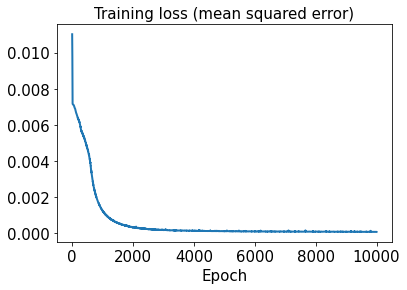

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

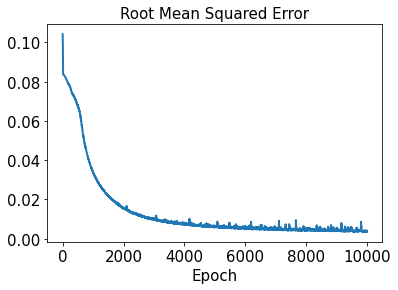

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

5/5 [==============================] - 0s 2ms/step - loss: 6.6774e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0011921865


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0790107


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0009506036, 0.00071367447, 0.00060708536, 0.001281883, 0.000755456, 0.00070496654, 0.0008302153, 0.0015538749, 0.001321718, 0.0023574776, 0.0010155211, 0.0007742719, 0.0006575719, 0.0016397726, 0.0007479067, 0.0008122943, 0.0011169636, 0.0011027756, 0.0011240573, 0.0015731017, 0.0010073414, 0.00087231543, 0.0011843529, 0.0008615805, 0.00083476503, 0.0012066292, 0.0018670415, 0.002017889, 0.0012965851, 0.00068036444, 0.001257647, 0.00097082776, 0.0015258197, 0.0020055647, 0.0008181082, 0.00086846313, 0.0017717133, 0.0019885756, 0.0026053388, 0.0017576263, 0.0009213759, 0.00095364975, 0.00090423296, 0.0011425058, 0.0015122928, 0.00085834943, 0.00079000596, 0.0020567512, 0.0015008354, 0.0011932537, 0.0013265772, 0.00069023785, 0.0011032708, 0.0013853955, 0.0024504438, 0.0014909296, 0.0008778655, 0.0016881187, 0.0011316709, 0.0005617589, 0.0013981144, 0.00079876854, 0.0011118789, 0.0008636315, 0.0013045517, 0.0009875451, 0.0019401434, 0.0010742323, 0.0011254763, 0.002417379, 0.000955308

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.01641672, 0.002080514, 0.013274792, 0.007408973, 0.007204129, 0.15407932, 0.024711084, 0.01599329, 0.0040545403, 0.08345766, 0.17160448, 0.024132479, 0.28150198, 0.0032683322, 0.0038935759, 0.0062340926, 0.01656257, 0.048860073, 0.0119544035, 0.0076193023, 0.0043713762, 0.01732617, 0.0046673445, 0.027347783, 1.1808008, 0.014450052, 0.08133094, 0.0055680494, 0.08579534, 0.034820057, 0.0031642807, 0.011595831, 0.0032697052, 0.01767585, 0.64111704, 0.105229944, 0.007945921, 0.0043788753, 0.0045805234, 0.07470283, 0.22389346, 0.036446653, 0.0033000289, 0.0035997322, 0.051799264, 0.07458374, 0.0052308613, 0.026066175, 0.056802355, 0.30873543, 0.015639659, 0.0073234034, 0.36520025, 0.0045597823, 0.016920561, 0.019940948, 0.020268504, 0.0039946805, 0.06602533, 0.018487956, 0.013484624, 0.022340277, 0.010721769, 0.0060576093, 0.19214866, 0.0038916524, 0.013877868]


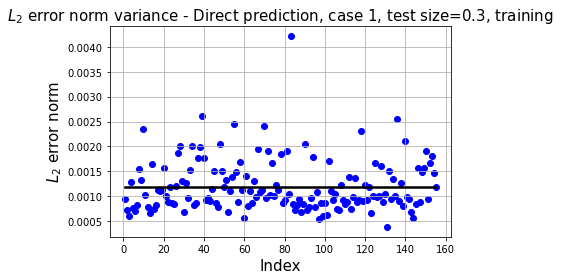

In [46]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 1, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

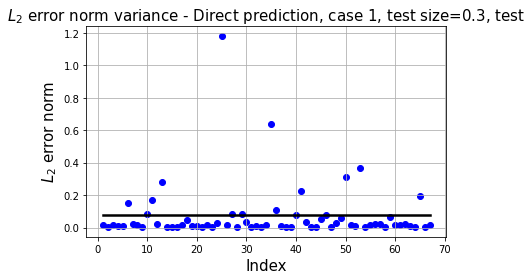

In [47]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 1, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

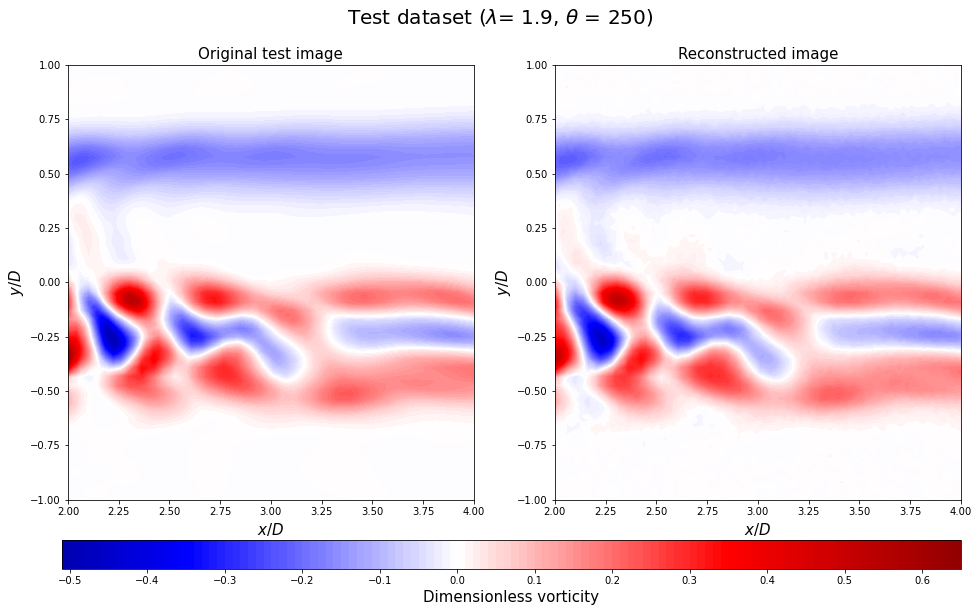

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

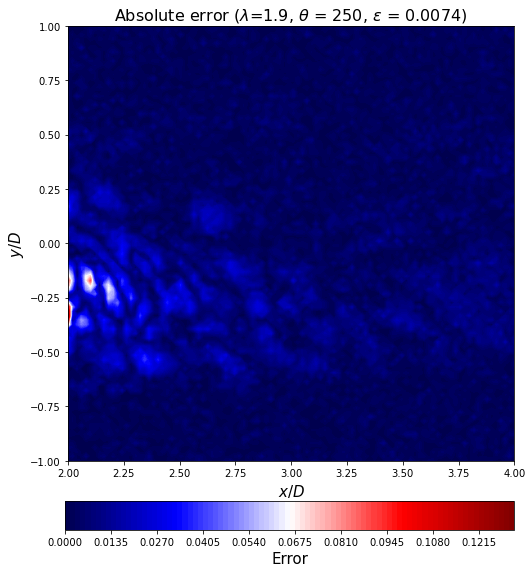

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()